In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
data = pd.read_csv("/content/housing.csv")


In [6]:
print("Shape of dataset:", data.shape)
print("\nColumns:\n", data.columns)
print("\nMissing values:\n", data.isnull().sum())
print("\nStatistical Summary:\n", data.describe())


Shape of dataset: (20640, 10)

Columns:
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Missing values:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Statistical Summary:
           longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -

In [7]:
# Fill missing numerical columns with their median
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


/tmp/ipython-input-3468848861.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


In [8]:
le = LabelEncoder()
data['ocean_proximity'] = le.fit_transform(data['ocean_proximity'])


In [9]:
X = data[['longitude', 'latitude', 'housing_median_age',
          'total_rooms', 'total_bedrooms', 'population',
          'households', 'median_income', 'ocean_proximity']]

y = data['median_house_value']


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

📊 Model Evaluation:
MAE: 51820.75
MSE: 5062019613.46
RMSE: 71147.87
R² Score: 0.61


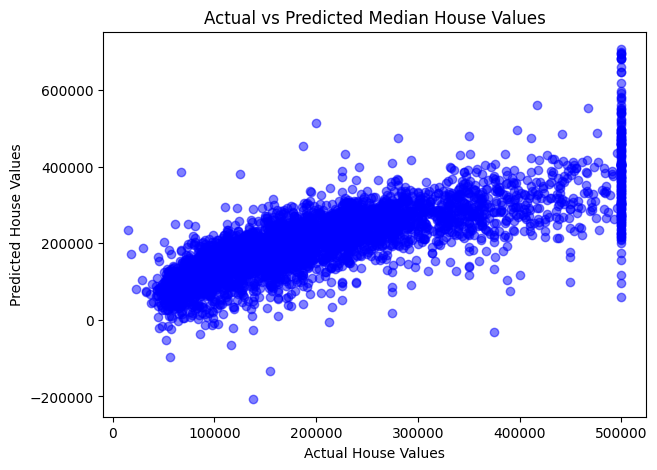

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual House Values")
plt.ylabel("Predicted House Values")
plt.title("Actual vs Predicted Median House Values")
plt.show()


In [17]:
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nFeature Importance:\n", coef_df)



Feature Importance:
                      Coefficient
longitude          -85764.639173
latitude           -90916.269169
housing_median_age  14904.333837
total_rooms        -17750.038324
total_bedrooms      48812.686550
population         -43707.119960
households          17664.338712
median_income       76963.396051
ocean_proximity      -452.934805


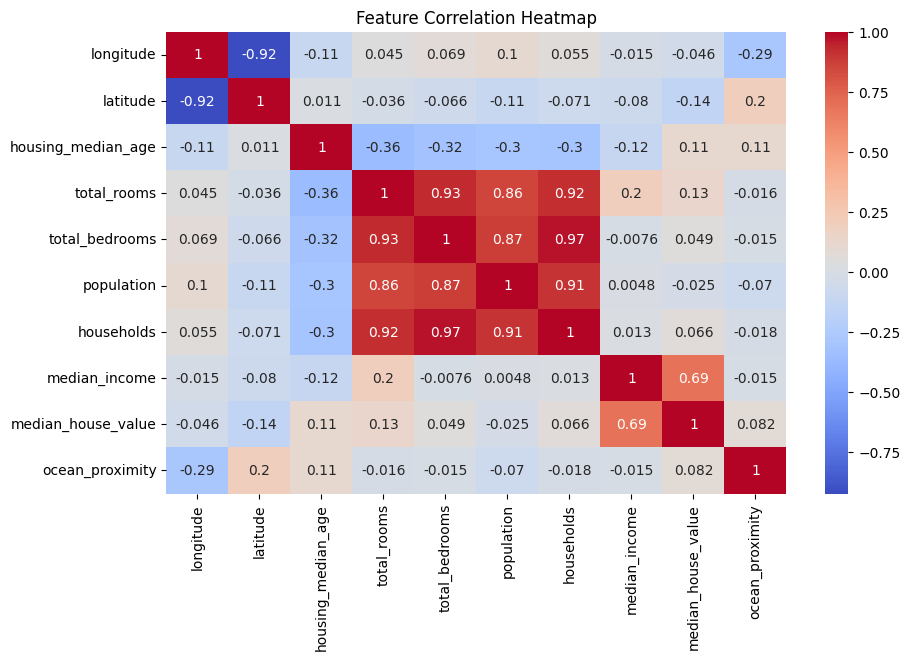

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
